In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot_util import PlotSVM2D
from util.plot_util import PlotSVM3D

### XOR problem

In [2]:
x0 = [True, True, False, False]
x1 = [True, False, True, False]

Y = np.logical_xor(x0, x1)
print(Y)

[False  True  True False]


Text(0, 0.5, 'x1')

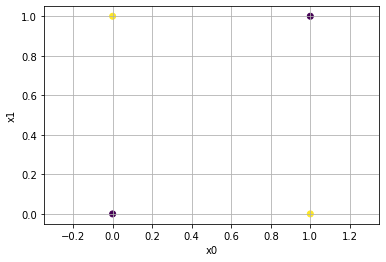

In [3]:
#plt.figure(dpi=150)
plt.scatter(x0, x1, c=Y)
plt.grid('on')
plt.axis('equal')
plt.xlabel('x0')
plt.ylabel('x1')

### Data preparation for XOR problem

In [4]:
np.random.seed(0)
X = np.random.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
print(Y[:5])

[False False  True  True  True]


In [5]:
Y = np.where(Y, 1, 0)
print(Y[:5])

[0 0 1 1 1]


In [6]:
X.shape

(200, 2)

In [7]:
Y.shape

(200,)

In [8]:
x0 = X[:, 0]
x1 = X[:, 1]

Text(0, 0.5, 'x1')

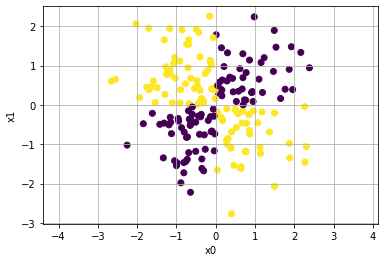

In [9]:
plt.scatter(x0, x1, c=Y)
plt.grid('on')
plt.axis('equal')
plt.xlabel('x0')
plt.ylabel('x1')

<center>$(x_1, x_2) \;\;\; \rightarrow \;\;\; \phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)$</center>

In [10]:
x0 = X[:, 0]**2
x1 = X[:, 1]**2
x2 = np.sqrt(2)*X[:, 0]*X[:, 1]

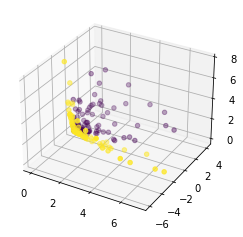

In [11]:
#%matplotlib notebook  # 3d plot 움직일 수 있음
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0,x2,x1, c=Y)

## SVM Test #1

2D input data (XOR) & Linear kernel

In [12]:
from sklearn.svm import SVC

model1 = SVC(kernel="linear")
model1.fit(X, Y)

SVC(kernel='linear')

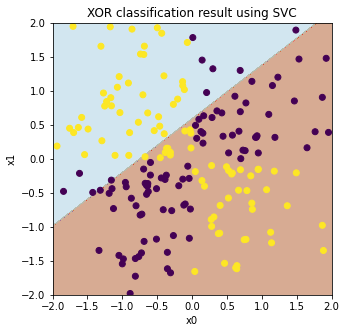

In [13]:
PlotSVM2D(X, Y, model1, "XOR classification result using SVC")
plt.show()

## SVM Test #2

3D input data (XOR) & Linear kernel

In [14]:
X2 = np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

In [15]:
X2.shape

(200, 3)

In [16]:
model2 = SVC(kernel ='linear')

In [17]:
model2.fit(X2, Y)

SVC(kernel='linear')

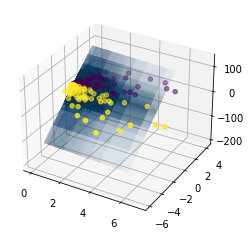

In [18]:
PlotSVM3D(X2, Y, model=model2)

## SVM Test #3

2D input data (XOR) & Conversion Function

In [19]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

In [20]:
from sklearn.pipeline import Pipeline

model3 = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))])
model3.fit(X, Y)

Pipeline(steps=[('basis',
                 FunctionTransformer(func=<function basis at 0x000001EC3E1AA0D8>)),
                ('svc', SVC(kernel='linear'))])

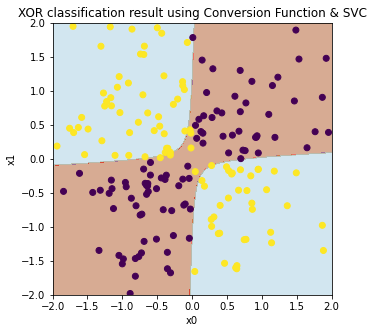

In [21]:
PlotSVM2D(X, Y, model3, "XOR classification result using Conversion Function & SVC")
plt.show()

In [22]:
y_pred = model3.predict(X)

In [27]:
import pandas as pd
conf_matrix = pd.crosstab(Y, y_pred)

In [28]:
print(conf_matrix)

col_0   0   1
row_0        
0      98   1
1       7  94


In [23]:
from util.plot_util import plot_confusion_matrix

In [24]:
class_name = ['purple', 'yellow']

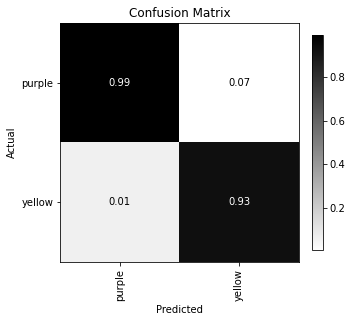

In [25]:
fig = plot_confusion_matrix(Y, y_pred, classes=class_name, figsize=(5,5), cmap = plt.cm.binary, normalize=True)

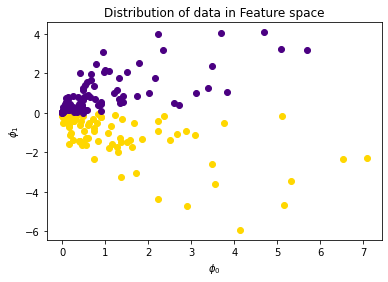

In [26]:
X2 = FunctionTransformer(basis).fit_transform(X)
#plt.figure(dpi=150)
plt.scatter(X2[Y == 1, 0], X2[Y == 1, 1], c='gold')
plt.scatter(X2[Y == 0, 0], X2[Y == 0, 1], c='indigo')
plt.title("Distribution of data in Feature space")
plt.xlabel(r"$\phi_0$")
plt.ylabel(r"$\phi_1$")
plt.show()